In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [28]:
!unzip /content/drive/MyDrive/img.zip

Archive:  /content/drive/MyDrive/img.zip
replace img/MEN/Denim/id_00000080/01_1_front.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
!unzip "/content/drive/MyDrive/img.zip" -d "/content/drive/MyDrive/img_dataset0"

Archive:  /content/drive/MyDrive/img.zip
replace /content/drive/MyDrive/img_dataset0/img/MEN/Denim/id_00000080/01_1_front.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
Men_image_path = "/content/img/MEN"
Women_image_path = "/content/img/WOMEN"

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("/content/img"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [33]:
import tensorflow as tf            
IMG_SIZE = (224, 224)
Men_data_2 = tf.keras.preprocessing.image_dataset_from_directory(Men_image_path,
                                                                           label_mode="categorical",
                                                                           batch_size=32, # default
                                                                           image_size=IMG_SIZE)
Women_data_2=tf.keras.preprocessing.image_dataset_from_directory(Women_image_path,label_mode="categorical",
                                                                 batch_size=32,image_size=IMG_SIZE)

Found 7838 files belonging to 9 classes.
Found 44874 files belonging to 14 classes.


In [34]:
count_men,count_women=0,0
for i in os.listdir(Men_image_path):
  count_men=count_men+len(os.listdir(Men_image_path+"/"+i))
print(count_men)
for i in os.listdir(Women_image_path):
  count_women=count_women+len(os.listdir(Women_image_path+"/"+i))
print(count_women)


951
7131


In [35]:
print(Men_data_2.class_names)
print(Women_data_2.class_names)

['Denim', 'Jackets_Vests', 'Pants', 'Shirts_Polos', 'Shorts', 'Suiting', 'Sweaters', 'Sweatshirts_Hoodies', 'Tees_Tanks']
['Blouses_Shirts', 'Cardigans', 'Denim', 'Dresses', 'Graphic_Tees', 'Jackets_Coats', 'Leggings', 'Pants', 'Rompers_Jumpsuits', 'Shorts', 'Skirts', 'Sweaters', 'Sweatshirts_Hoodies', 'Tees_Tanks']


In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255)
], name ="data_augmentation")
train = ImageDataGenerator(
    rescale = 1./255.,rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True    
)

train1 = train.flow_from_directory(
    '/content/img/' , 
    target_size=(150, 150),
    batch_size = 64, 
    class_mode = "categorical" ,
    classes  = ['MEN','WOMEN'],
    shuffle = True,
)

Found 52712 images belonging to 2 classes.


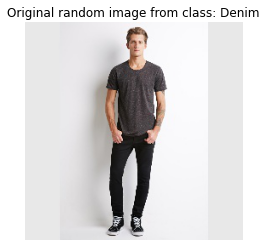

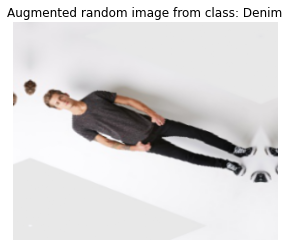

In [45]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = "Denim" # choose a random class
target_dir = "/content/img/MEN/Denim/id_00000080"
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

(64, 150, 150, 3) (64, 2)


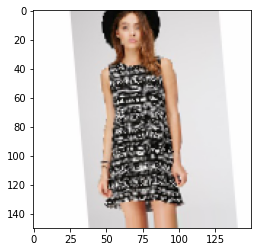

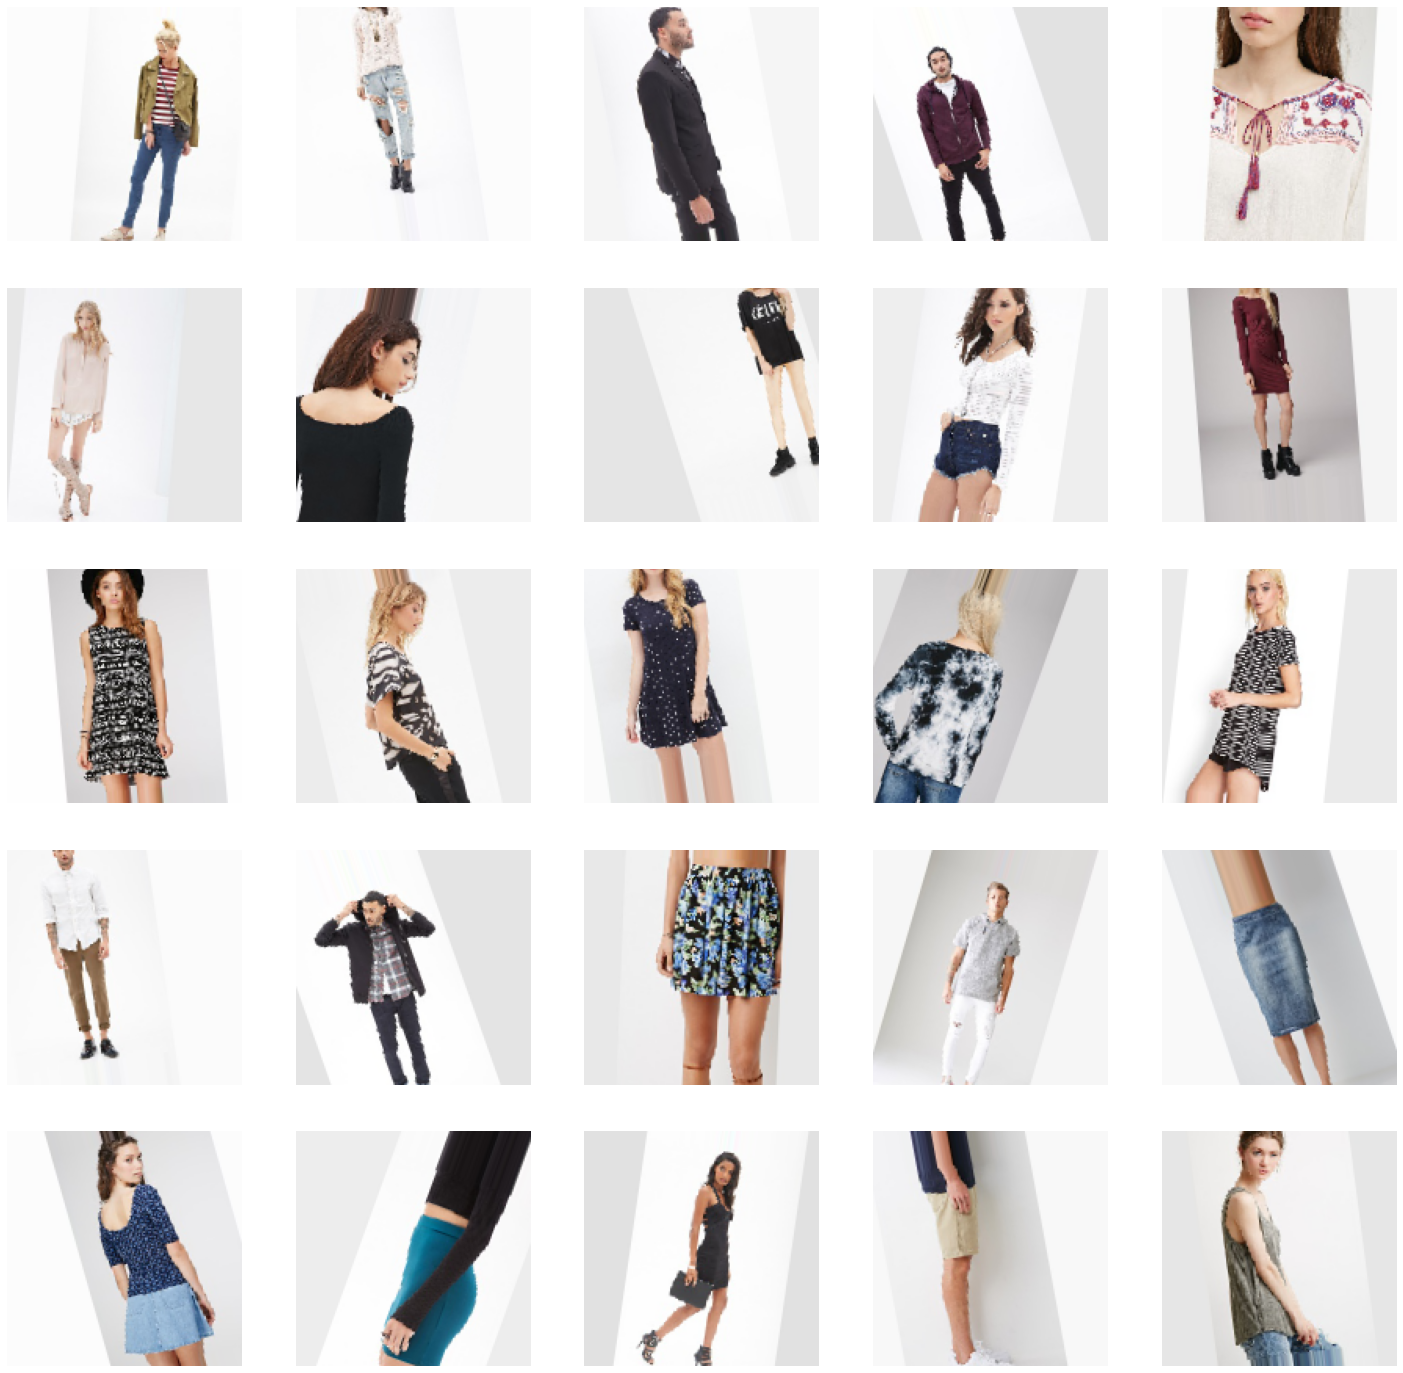

In [44]:
x_img, y_img = next(train1)
print(x_img.shape,y_img.shape)
plt.imshow(x_img[10])
def plot_25(img,label):
  plt.figure(figsize=(25,25))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
plot_25(x_img,y_img)